Les informations de la base de données se trouve ici : https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?resource=download


# EDA réalisé dans le cadre d'une premiere exploration des données , ce document servira de base de travail pour de futurs explorations des données, un CheatSheet en quelques sortes !!!

## Commençons par une courte définition :
#### l'EDA est une méthode exploratoire qui permet d'analyser, de visualiser et de comprendre les données brutes afin de découvrir des modèles, des tendances et des insights importants, et de poser les bases pour des analyses plus avancées et des prises de décision éclairées, de plus prévenir et réduire les différents biais.


## Charger les bibliothèques nécessaires

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


## Charger la base de données et vérifier qu'elle est chargée

In [5]:
df = pd.read_excel('data/Sleep_health_and_lifestyle_dataset_bruit.xlsx')
df.sample(5)

,Person ID,Gender,Age,Occupation,Temperatur,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
295,296,Female,50.0,Nurse,22.1,6.0,6.0,90.0,8.0,Overweight,140/95,75.0,10000.0,Sleep Apnea
130,131,Female,38.0,Accountant,NaN,7.1,8.0,60.0,4.0,Normal,115/75,68.0,7000.0,NaN
313,314,Female,52.0,Engineer,NaN,8.4,9.0,30.0,3.0,Normal,125/80,65.0,5000.0,NaN
212,213,Male,43.0,Engineer,21.0,7.8,8.0,90.0,5.0,Normal,130/85,70.0,8000.0,NaN
88,89,Male,35.0,Engineer,20.6,7.3,8.0,60.0,4.0,Normal,125/80,65.0,5000.0,NaN


## Créer une copie de votre df

In [6]:
df_copy = df.copy()

## Analyser les features
##### Afficher sans répétition le contenu de chaque feature

In [7]:
# df.shape
df.info()
# df.head()
# df.describe()
# df.dtypes
# df.tail()
# df.columns
# df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   370 non-null    object 
 2   Age                      369 non-null    float64
 3   Occupation               366 non-null    object 
 4   Temperatur               201 non-null    float64
 5   Sleep Duration           368 non-null    float64
 6   Quality of Sleep         371 non-null    float64
 7   Physical Activity Level  369 non-null    float64
 8   Stress Level             370 non-null    float64
 9   BMI Category             360 non-null    object 
 10  Blood Pressure           367 non-null    object 
 11  Heart Rate               363 non-null    float64
 12  Daily Steps              371 non-null    float64
 13  Sleep Disorder           155 non-null    object 
dtypes: float64(8), int64(1), o

In [8]:
df.head()

,Person ID,Gender,Age,Occupation,Temperatur,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27.0,Software Engineer,20.0,6.1,6.0,42.0,6.0,Overweight,126/83,77.0,4200.0,NaN
1,2,Male,28.0,Doctor,21.0,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000.0,NaN
2,3,Male,28.0,Doctor,20.0,6.2,6.0,60.0,8.0,Normal,125/80,75.0,10000.0,NaN
3,4,Male,28.0,Sales Representative,21.2,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000.0,Sleep Apnea
4,5,Male,28.0,Sales Representative,22.1,5.9,4.0,30.0,8.0,Obese,140/90,85.0,3000.0,Sleep Apnea


##### pour une première visualisation, on peut remarquer que certaine colonne sont des Floats, que la colonne 'Person ID' peut poser un problème pour la detection des doublons,
##### et que la colonne 'Age' est rangée par ordre croissant!

### voici de courte définition des différentes méthodes pour une pré-explorations des données ( CheatSheet )
##### df.shape : Renvoie un tuple contenant le nombre de lignes et de colonnes
##### df.info() : Affiche des informations générales sur le dataframe
##### df.head() : Affiche les premières lignes du dataframe
##### df.describe() : Fournit un résumé statistique des colonnes numériques du dataframe
##### df.dtypes : Renvoie les types de données des colonnes du dataframe
##### df.tail() : Affiche les dernières lignes du dataframe
##### df.columns : Renvoie les noms des colonnes du dataframe
##### df.isna().sum() : Calcule le nombre de valeurs manquantes (NaN) dans chaque colonne du dataframe

## Si existant, supprimer le feature qui ne servira pas ou qui pourrait poser problème pour la suite

In [9]:
# version 1
df.drop(['Person ID'], axis=1, inplace=True)
df.columns


# version 2
#if df['Person ID'] :
    #df.drop('Person ID', axis=1, inplace=True)

Index(['Gender', 'Age', 'Occupation', 'Temperatur', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

##### Nous avons déterminé au préalable que la colonne ' Person ID ' ne peut nous permettre de trouver les doublons , par le simple fait que chaque lignes est indexé a un 'ID' , par conséquent
##### si dans nos colonnes , nous sommes en capacité de voir en affichant le dataframe qu'il existe des redondances dans les informations , il nous est impossible de les traiter comme telle
##### puisque qu'elle ont chacune, un 'ID' différent et donc sont pas considéré comme doublons

# correction des anomalies existantes

In [10]:
# la méthode 'df.duplicated()' sers à identifier si il existe des doublons dans notre DataFrame, suivi de '.sum()' pour avoir la somme de toutes les lignes considérées comme telle
df.duplicated().sum()

np.int64(102)

##### on remarque donc qu'il y a 102 elements qui sont considéré comme des doublons et qui serons inutiles lors des prochaines phases de traitement de nos données

In [11]:
# l'étape suivante, on va utiliser la fonction 'df.drop_duplicated', afin d'enlever les lignes considérées lors de l'étape précédente comme des doublons
# puis nous allons réappliquer le méthode vu ci-dessus pour confirmer que nos doublons ont bien étaient drop(supprimer)
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

## Afficher la somme des données manquantes par chaque feature en pourcentage
##### dans la fonction suivante nous allons utiliser la méthode 'isna' et 'sum'
##### 'isna()' permettant de récupérer dans chaque colonnes de notre DataFrame les données manquantes
##### 'sum()' de faire la somme par colonnes
##### que l'on va ensuite diviser par le nombre de lignes de notre DataFrame( ' len(df) ' ) et le multiplier par 100
##### pour nous permettre d'obtenir un pourcentage, afin d'identifier plus simplement les colonnes qui contiendraient le plus de données manquantes

In [12]:
df.isna().sum() / len(df) * 100

Gender                      1.470588
Age                         1.838235
Occupation                  2.941176
Temperatur                 35.294118
Sleep Duration              2.205882
Quality of Sleep            1.102941
Physical Activity Level     1.838235
Stress Level                1.470588
BMI Category                5.147059
Blood Pressure              2.573529
Heart Rate                  3.676471
Daily Steps                 1.102941
Sleep Disorder             61.764706
dtype: float64

## Visualiser le heatmap des données manquantes
##### voir un tableau avec des pourcentages est une étape qui nous permet certes de visualiser quel colonnes en contient le plus
##### mais sous forme graphique cela nous permettra d'avoir une meilleure vue d'ensemble, et ainsi nous servir de support d'explication

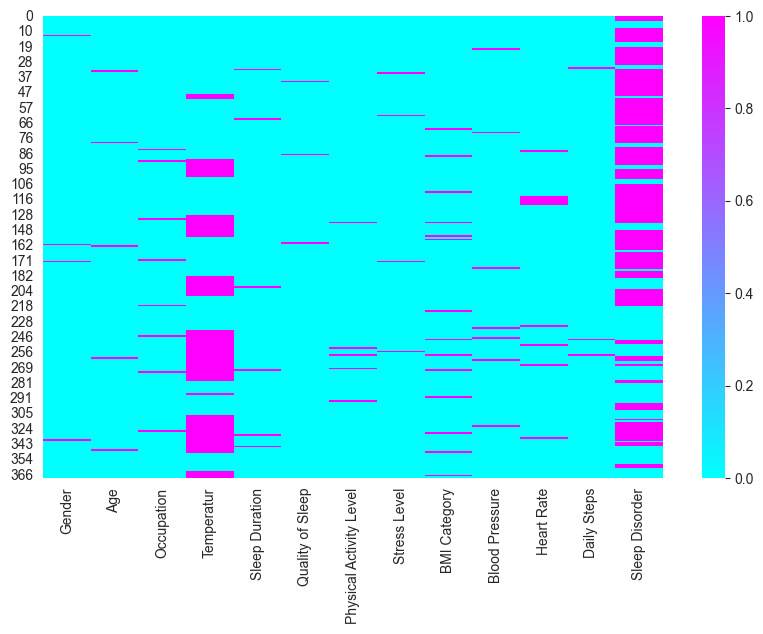

In [13]:
# nous allons donc utiliser deux bibliothèques, que nous avons précédemment importé dans la premiere cellule de notre document.
# grace à  Matplotlib , nous allons être en capacité de créer une visualisation graphique de notre tableau de pourcentage.
# pour ce faire , nous allons utiliser 'figure' de matplotlib, pour créer la forme et les dimensions du graphique.
# puis 'heatmap' provenant de la bibliotheque seaborn , qui permet de définir le type et le contenue du graphique.
# nous concluons avec 'show' de matplotlib pour afficher l'ensemble.

plt.figure(figsize=(10,6))
heatmap = sns.heatmap(df.isna(), cmap='cool')
plt.show()

##### # PS: il existe un certain nombre de paramètres autant pour Seaborn que pour Matplotlib
##### n'hésitez pas a faire les recherches dans leurs documentations respectives pour customiser vos graphiques !!

In [14]:
# suite a l'affichage de notre graphique, nous pouvons nous rendre compte que la colonne 'Sleep Disorder' est considérée comme ayant un fort taux de données manquantes ( 63% )
# pourtant dans le document fournie par le client, il est bien précisé que l'appellation 'NaN' signifie que le patient n'a pas de problème de sommeil
# nous allons devoir y remédier pour pouvoir continuer a travail sur notre DataSet
# avant tout vérifions si c'est bien la seule informations que nous avons à modifier dans cette colonne
df['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

## Remplacer les 'None' par une autre valeur pour que ça ne soit pas considéré comme manquant
##### nous allons donc dans un premier temps remplacer les données 'NaN' de la colonne 'Sleep Disorder'
##### précision nécessaire : la colonne 'Sleep Disorder' est considéré comme notre Target, autrement dit la colonne qui nous sert de référence dans notre analyse des données.

In [15]:
# ici nous allons utiliser la methode 'fillna' et qui vas nous permettre de remplacer les données 'NaN' considérées comme manquantes
# par une suite de character, pour l'exemple présent 'Good Sleep'
# ensuite nous réutilisons '.isna().sum()' pour vérifier si notre commande précédente c'est exécuté correctement et retourne un resultat NULL
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Good Sleep')
df['Sleep Disorder'].isna().sum()

np.int64(0)

## Drop des colonnes qui ont un pourcentage de valeur manquante supérieur à 20%
#### nous définissons dans le cas présent que 20% est un seuil critique à ne pas dépasser, pour qu'une colonne soit utile dans notre analyse de données

In [16]:
# nous allons donc créer une variable 'threshold' qui retournera un entier par rapport au nombre de ligne du DataFrame multiplier par 0,8
# nous mettons ici 0,8 car la commande suivante '.dropna' a pour argument 'thresh'
# 'thresh' considère que le parametre qui lui est affecté, est le pourcentage dont il ne doit pas s'occuper , dans le cas present 0,8 représente 80%
# alors 'thresh' ne prendra en consideration que les colonnes n'ayant qu'un taux supérieur à 20% de données manquantes
# pour finir nous allons utiliser 'df.columns' pour verifier que la colonne 'Temperatur' à bien était supprimé
threshold =int(len(df) * 0.8)
df = df.dropna(thresh=threshold, axis=1)
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category',
       'Blood Pressure', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'],
      dtype='object')

# Traitement de l'anomalie de la colonne 'BMI Category'

#### En jetant un rapide coup d'oeil à la colonne 'BMI Category', nous pouvons constater que certaines données n'ont pas été correctement orthographiées.

In [17]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Norm', 'Normal Weight', 'Norma',
       nan], dtype=object)

### Dans le document que nous a fourni le client, il est bien spécifié que la colonne 'BMI Category' n'est composé que de trois types
### 'Underweight', 'Normal' et 'Overweight'
### Ce qui nous permet de conclure que les types : 'Norma', 'Norm', 'Normal' et 'NaN'
### Sont probablement des fautes de saisie, et correspondent au type 'Normal'

#### Pour ce faire, nous allons utiliser la fonction '.replace' afin que toutes les erreurs de saisie soient corrigées

In [18]:
df['BMI Category'].replace( {"Norm": "Normal Weight", "Norma": "Normal Weight", "Normal": "Normal Weight", "Nan": "Normal Weight"}, inplace=True)
df['BMI Category'].unique()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_7476\2082458035.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI Category'].replace( {"Norm": "Normal Weight", "Norma": "Normal Weight", "Normal": "Normal Weight", "Nan": "Normal Weight"}, inplace=True)


array(['Overweight', 'Normal Weight', 'Obese', nan], dtype=object)

### Nous observons tout de même que le type 'NaN' est toujours présent !!
### Comme nous l'avons vu dans le cas précédent 'NaN' est considéré comme une case vide, appliquons la même méthode que pour 'Sleep Disorder'

In [19]:
df['BMI Category'] = df['BMI Category'].fillna('NaN')
df['BMI Category'].replace({"NaN": "Normal Weight"}, inplace=True)
df['BMI Category'].unique()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_7476\1078456907.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI Category'].replace({"NaN": "Normal Weight"}, inplace=True)


array(['Overweight', 'Normal Weight', 'Obese'], dtype=object)

## Revisualisation de la heatmap pour controler le dataframe et les valeurs manquantes

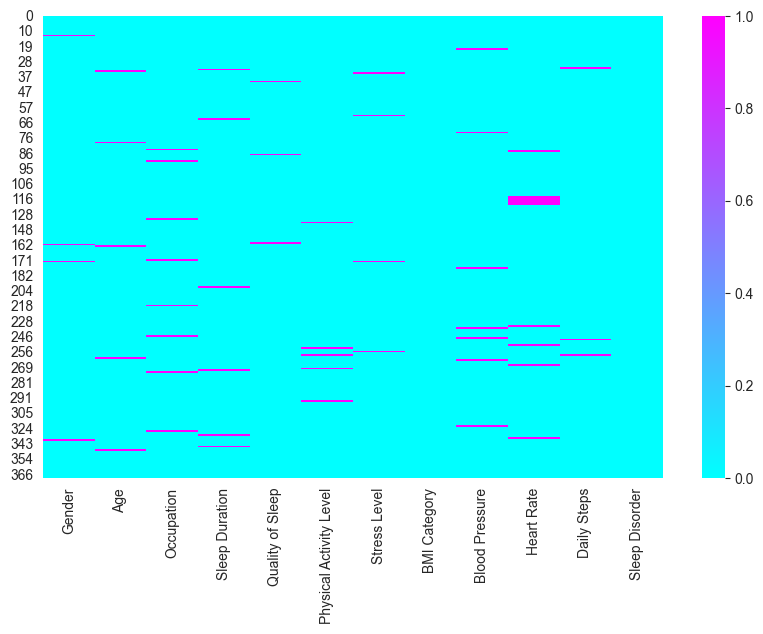

In [20]:
plt.figure(figsize=(10,6))
heatmaps = sns.heatmap(df.isna(), cmap='cool')
plt.show()

## Maintenant que nous avons fini cette étape, je vous propose d'afficher différent type de graphiques en rapport avec notre DataFrame

### voici une visualisation rapide en histogramme de notre DataFrame

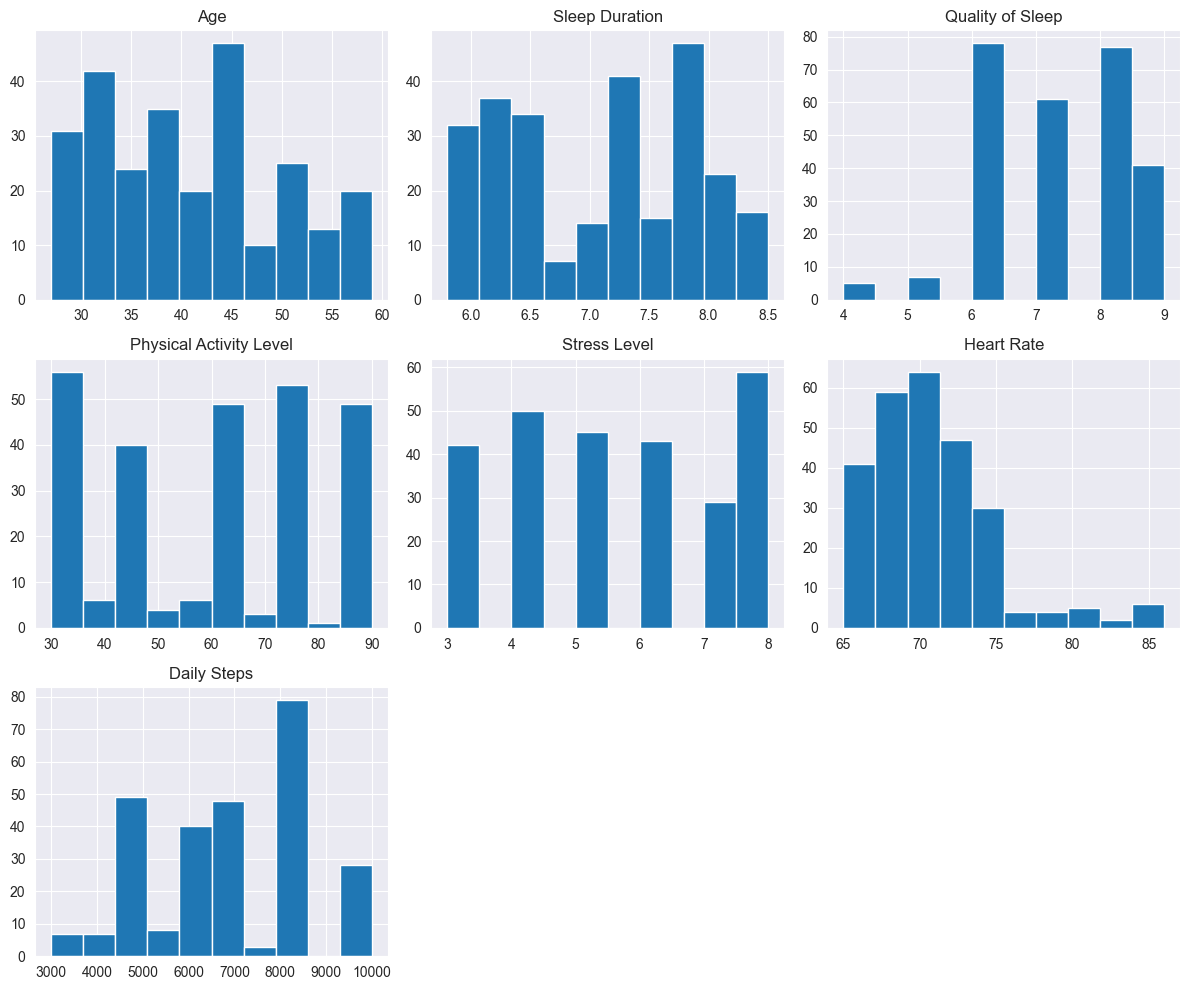

In [21]:
df.hist(bins=10, figsize=(12, 10))
plt.tight_layout()
plt.show()

### nous pouvons aussi afficher un camembert des types de données qui compose notre DataFrame
##### avec les pourcentages au format un entier virgule un entier et le signe pourcentage

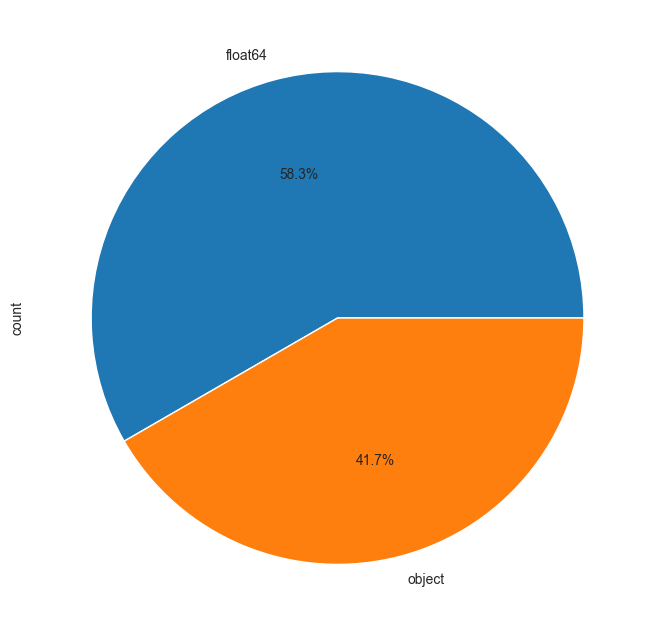

In [22]:
camembert = df.dtypes.value_counts().plot.pie(figsize=(8, 8), autopct="%1.1f%%")

#### nous pouvons aussi utiliser les boites à moustache comme ci-dessous, mais pas d'inquiétude nous verrons leur utilité plus tard !

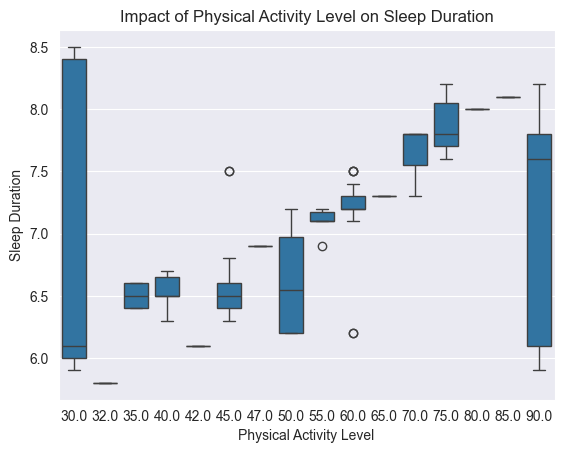

In [23]:
sns.boxplot(x="Physical Activity Level", y="Sleep Duration", data=df)
plt.xlabel("Physical Activity Level")
plt.ylabel("Sleep Duration")
plt.title("Impact of Physical Activity Level on Sleep Duration")
plt.show()

### Aprés ce court moment de fun, reprenons notre analyse en nettoyant les différentes anomalies

# / Nettoyage des colonnes / définition des types de données manquantes /
## La colonne 'Age':
#### Nous avions pu déterminer lors de notre première phase d'exploration des données que la colonne 'Age' était rangée par ordre croissant
#### Ce qui va nous faciliter la tâche pour déterminer la méthode la plus appropriée pour remplir nos données manquantes
#### 1-Données manquantes complètement au hasard (Missing Completely At Random - MCAR) :
#### Définition : Les valeurs manquantes sont complètement aléatoires et n'ont aucune relation avec les autres variables ou les données manquantes elles-mêmes.
### Ca colle plutôt bien au cas de notre colonne 'Age' !!!!


## Remplir les valeurs manquantes de la colonne 'AGE' avec la valeur non manquantes la plus proche !
#### Nous allons donc utiliser la méthode 'bfill' pour remplir les valeurs manquantes avec la valeur suivante disponible dans la colonne.
#### Cette approche est utile lorsque les données présentent une certaine séquence ou une sorte de relation ordonnée.
#### En utilisant 'bfill', les valeurs manquantes sont remplacées par des valeurs existantes qui suivent généralement un certain modèle ou une certaine tendance.
## Et comme nous avons pris l'habitude de le faire ont fini par '.isna().sum()' pour vérifier que nos valeurs manquantes ont bien été remplies.

In [24]:
df['Age'].isna().sum()

np.int64(5)

In [25]:
df['Age'] = df['Age'].fillna(method='bfill')
df['Age'].isna().sum()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_7476\3938232014.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Age'] = df['Age'].fillna(method='bfill')


np.int64(0)

# La colonne 'Gender':

### Commençons par déterminer le nombre de valeurs manquantes dans la colonne 'Gender'

In [26]:
df['Gender'].isna().sum()

np.int64(4)

## Pour cette étape, nous allons appliquer une autre méthode de recherche qui va nous permettre de visualiser les lignes qui contiennent des valeurs manquantes de la colonne 'Gender'
#### Cette fonction est utile lorsque nous souhaitons filtrer ou manipuler spécifiquement les lignes avec des valeurs manquantes dans une colonne donnée.
#### Nous pouvons ensuite utiliser ce sous-ensemble de données pour des analyses spécifiques ou pour traiter les valeurs manquantes d'une manière particulière.

In [27]:
df.loc[df['Gender'].isna()]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
12,NaN,29.0,Doctor,6.1,6.0,30.0,8.0,Normal Weight,120/80,70.0,8000.0,Good Sleep
161,NaN,40.0,Accountant,7.2,8.0,55.0,6.0,Normal Weight,119/77,73.0,7300.0,Good Sleep
171,NaN,41.0,Lawyer,7.7,8.0,90.0,NaN,Normal Weight,130/85,70.0,8000.0,Good Sleep
338,NaN,54.0,Engineer,8.5,9.0,30.0,3.0,Normal Weight,125/80,65.0,5000.0,Good Sleep


#### Ce que le tableau nous permet de déduire, c'est nous avons à faire :
#### Des données manquantes au hasard (Missing At Random - MAR) :
##### Définition : Les valeurs manquantes sont conditionnellement aléatoires, c'est-à-dire qu'elles dépendent d'autres variables observées, mais pas des valeurs manquantes elles-mêmes.
#### Nous décidons de remplir les valeurs manquantes ( valeurs catégorielles ) par le mode.
#### Imputation par le mode (mode imputation) :
##### Définition : Remplacer les valeurs manquantes par le mode (la valeur la plus fréquente) des valeurs observées dans la même variable.
###### je sais que ça beaucoup de definition d'un coup, accrochez-vous !!

In [49]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Gender'].isna().sum()

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_7476\3094062768.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)


np.int64(0)

# La colonne 'Occupation':

### Nous allons maintenant devoir determiner une méthode pour remplacer les valeurs manquantes de la colonne 'Occupation'
#### Pour commencer le nombre de valeurs manquantes dans la colonne 'Occupation'

In [29]:
df['Occupation'].isna().sum()

np.int64(8)

#### Pour cette prochaine étape, puisque la colonne est celle des métiers, nous cherchons à obtenir, quel métier revient le plus dans notre base de données ?
#### nous allons donc utiliser la méthode '.value_counts()' pour connaitre le nombre d'occurrences par métier.

In [30]:
df['Occupation'].value_counts()

Occupation
Doctor                  63
Nurse                   53
Engineer                39
Lawyer                  31
Teacher                 28
Accountant              23
Salesperson             16
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

##### On remarque que les métiers de Docteur et d'infirmière sont majoritaires dans notre base de données.

#### Nous allons appliquer la même méthode que pour la colonne 'Gender', afin d'observer si l'on peut faire des liens avec d'autres colonnes de notre base données.

In [31]:
df.loc[df['Occupation'].isna()]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
83,Male,35.0,NaN,6.7,7.0,40.0,5.0,Overweight,128/84,70.0,5600.0,Good Sleep
90,Male,35.0,NaN,7.3,8.0,60.0,4.0,Normal Weight,125/80,65.0,5000.0,Good Sleep
137,Male,38.0,NaN,7.1,8.0,60.0,5.0,Normal Weight,130/85,68.0,8000.0,Good Sleep
170,Male,41.0,NaN,7.7,8.0,90.0,5.0,Normal Weight,130/85,70.0,8000.0,Good Sleep
217,Male,43.0,NaN,7.8,8.0,90.0,5.0,Normal Weight,130/85,70.0,8000.0,Good Sleep
245,Female,44.0,NaN,6.5,7.0,45.0,4.0,Overweight,135/90,65.0,6000.0,Insomnia
271,Female,49.0,NaN,6.1,6.0,90.0,8.0,Overweight,140/95,75.0,10000.0,Sleep Apnea
327,Female,53.0,NaN,8.5,9.0,30.0,3.0,Normal Weight,125/80,65.0,5000.0,Good Sleep


#### Nous observons qu'il n'y a pas de correspondance évidente avec les autres colonnes, sauf celle de 'Gender' qui pourrait être notre meilleure option.
#### Nous décidons donc de créer un lien plausible entre les résultats de nos deux derniers tableaux. ( les métiers / le genre ).

#### Dans la fonction suivante, nous allons utiliser la méthode 'groupby' pour nous permettre de regrouper les données en fonction de chaque groupe de la colonne 'Gender' et de trouver la valeur la plus fréquente de la colonne 'Occupation'.
#### Et grâce à la fonction 'lambda' cela nous permet de retourner la valeur la plus fréquente des colonnes 'Gender' et 'Occupation'.

In [32]:
gender_occupation = df.groupby('Gender')['Occupation'].apply(lambda x: x.mode()[0])
gender_occupation

Gender
Female     Nurse
Male      Doctor
Name: Occupation, dtype: object

### Nous remarquons par ce resultat que les tendances dans la base de données sont que:
#### Les hommes sont majoritairement des docteurs.
#### Et que les femmes sont majoritairement des infirmières.
### Reprenons maintenant notre fonction d'exploration, mais un peu différemment, en rajoutant '.index' à la fin, pour nous permettre de récupérer les index
### Des données manquantes, c'est une autre méthode de vérification, comme nous le verrons ensuite.

In [33]:
df.loc[df['Occupation'].isna()].index

Index([83, 90, 137, 170, 217, 245, 271, 327], dtype='int64')

#### Ceci fait !! Nous allons continuer avec notre fonction 'groupby', mais cette fois-ci, nous appliquerons la méthode '.transform' pour appliquer notre précédent résultat
#### Et utiliser les index de nos données manquantes pour vérifier qu'elles ont bien été remplacées.

In [34]:
df['Occupation'] = df.groupby('Gender')['Occupation'].transform(lambda x: x.fillna(x.mode()[0]))
df.loc[[83, 90, 137, 170, 217, 245, 271, 327]]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
83,Male,35.0,Doctor,6.7,7.0,40.0,5.0,Overweight,128/84,70.0,5600.0,Good Sleep
90,Male,35.0,Doctor,7.3,8.0,60.0,4.0,Normal Weight,125/80,65.0,5000.0,Good Sleep
137,Male,38.0,Doctor,7.1,8.0,60.0,5.0,Normal Weight,130/85,68.0,8000.0,Good Sleep
170,Male,41.0,Doctor,7.7,8.0,90.0,5.0,Normal Weight,130/85,70.0,8000.0,Good Sleep
217,Male,43.0,Doctor,7.8,8.0,90.0,5.0,Normal Weight,130/85,70.0,8000.0,Good Sleep
245,Female,44.0,Nurse,6.5,7.0,45.0,4.0,Overweight,135/90,65.0,6000.0,Insomnia
271,Female,49.0,Nurse,6.1,6.0,90.0,8.0,Overweight,140/95,75.0,10000.0,Sleep Apnea
327,Female,53.0,Nurse,8.5,9.0,30.0,3.0,Normal Weight,125/80,65.0,5000.0,Good Sleep


# Faisons une petite pause, pour voir où nous en sommes !!
###### C'est important de prendre un peu de recul

#### Affichons simplement la somme des données manquantes de nos colonnes.

In [35]:
df.isna().sum()

Gender                      0
Age                         0
Occupation                  0
Sleep Duration              6
Quality of Sleep            3
Physical Activity Level     5
Stress Level                4
BMI Category                0
Blood Pressure              7
Heart Rate                 10
Daily Steps                 3
Sleep Disorder              0
dtype: int64

#### Allez la Heatmap, ça fait longtemps !

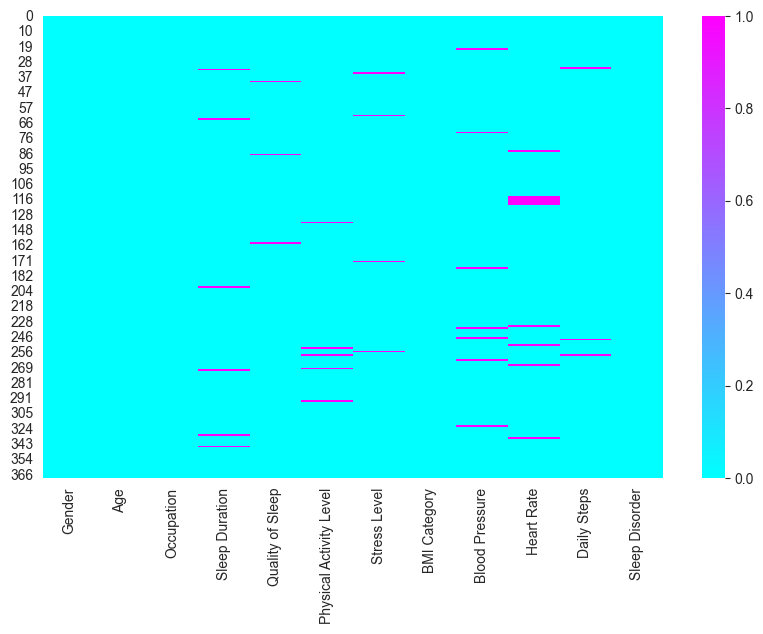

In [36]:
plt.figure(figsize=(10,6))
heatmaps = sns.heatmap(df.isna(), cmap='cool')
plt.show()

## Mes félicitations ça avance bien !!
#### Il nous reste encore quelques etapes !

# Voyons ensemble quel moyen mettre en place dans le cas des données numériques !

### Nous allons appliquer pour les 4 colonnes suivantes la méthode d'imputation par la moyenne, mais tout d'abords un peu de contexte
#### Imputation par la moyenne (mean imputation) :
##### Définition : Remplacer les valeurs manquantes par la moyenne des valeurs observées dans la même variable.

In [37]:
df['Quality of Sleep'] = df['Quality of Sleep'].fillna(df['Quality of Sleep'].mean())
df['Stress Level'] = df['Stress Level'].fillna(df['Stress Level'].mean())
df['Heart Rate'] = df['Heart Rate'].fillna(df['Heart Rate'].mean())
df['Daily Steps'] = df['Daily Steps'].fillna(df['Daily Steps'].mean())
df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             6
Quality of Sleep           0
Physical Activity Level    5
Stress Level               0
BMI Category               0
Blood Pressure             7
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

##### Grace à la méthode ci-dessus, il ne reste donc plus que trois colonnes à traiter !!

# ZOOM : le cas particulier de la colonne 'Blood Pressure'

### la particularité de la colonne 'Blood Pressure', c'est bel et bien son contenu
#### la case est composé de deux entiers séparés par '/', ce qui en l'état ne peut être utilisé
#### Nous devons donc réaliser cette opération afin de pouvoir exploiter les données
#### et ainsi remplacer les données existant par le resultat de l'opération préalablement exécutée

In [38]:
df['Blood Pressure'] = df['Blood Pressure'].fillna('0/0')
df['Blood Pressure'] = df['Blood Pressure'].astype(str).str.split('/').str[0].astype(int)
df['Blood Pressure']

0      126
1      125
2      125
3      140
4      140
      ... 
361    140
362    140
364    140
366    140
368    140
Name: Blood Pressure, Length: 272, dtype: int64

# Avant de continuer si nous visualisions notre Heatmap !!

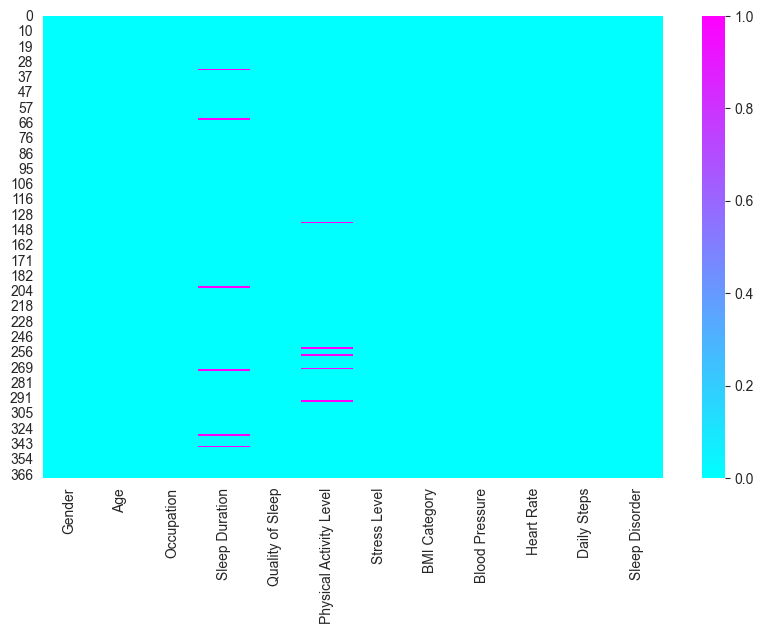

In [39]:
plt.figure(figsize=(10,6))
heatmaps = sns.heatmap(df.isna(), cmap='cool')
plt.show()

# Concentrons-nous sur les colonnes 'Sleep Duration' et 'Physical Activity Level'
### Ce qui va nous permettre d'aborder deux nouveaux concepts!!

### Pour la colonne 'Sleep Duration', nous allons d'abords explorer notre base de données, dans le but toujours de trouver un lien
### Qui nous permettrait de savoir quelle méthode utiliser.

In [40]:
df.loc[df['Sleep Duration'].isna()]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
32,Female,31.0,Nurse,NaN,8.0,75.0,4.0,Normal Weight,117,69.0,6800.0,Good Sleep
63,Male,32.0,Doctor,NaN,6.0,30.0,8.0,Normal Weight,125,72.0,5000.0,Good Sleep
195,Male,43.0,Salesperson,NaN,6.0,45.0,7.0,Overweight,130,72.0,6000.0,Insomnia
270,Female,49.0,Nurse,NaN,6.0,90.0,8.0,Normal Weight,140,75.0,10000.0,Sleep Apnea
331,Female,53.0,Engineer,NaN,9.0,30.0,3.0,Normal Weight,125,65.0,5000.0,Good Sleep
344,Female,57.0,Nurse,NaN,9.0,75.0,3.0,Overweight,140,68.0,7000.0,Sleep Apnea


In [41]:
df['Sleep Duration'].unique()

array([6.1, 6.2, 5.9, 6.3, 7.8, 6. , 6.5, 7.6, 7.7, 7.9, 6.4, nan, 7.5,
       7.2, 5.8, 6.7, 7.3, 7.4, 7.1, 6.6, 6.9, 8. , 6.8, 8.1, 8.3, 8.5,
       8.4, 8.2])

In [42]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df['Sleep Duration'] = imputer.fit_transform(df[['Sleep Duration']])

df['Sleep Duration'].isna().sum()

np.int64(0)

In [43]:
df['Physical Activity Level'].isna().sum()

np.int64(5)

In [44]:
df.loc[df['Physical Activity Level'].isna()]
# on observe que le pattern est MNAR , il est donc resonnable d'utiliser la regression lineaire

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
140,Female,38.0,Accountant,7.1,8.0,NaN,4.0,Normal Weight,115,68.0,7000.000000,Good Sleep
252,Female,45.0,Teacher,6.5,7.0,NaN,4.0,Overweight,135,65.0,6000.000000,Insomnia
258,Female,45.0,Teacher,6.6,7.0,NaN,4.0,Normal Weight,135,65.0,6872.490706,Insomnia
269,Female,49.0,Nurse,6.1,6.0,NaN,8.0,Overweight,140,75.0,10000.000000,Sleep Apnea
292,Female,50.0,Nurse,6.1,6.0,NaN,8.0,Overweight,140,75.0,10000.000000,Sleep Apnea


In [45]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer()

imputer.fit(df[['Physical Activity Level']])

df['Physical Activity Level'] = imputer.transform(df[['Physical Activity Level']]).round()

df.loc[[140, 252, 258, 269, 292]]

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
140,Female,38.0,Accountant,7.1,8.0,59.0,4.0,Normal Weight,115,68.0,7000.000000,Good Sleep
252,Female,45.0,Teacher,6.5,7.0,59.0,4.0,Overweight,135,65.0,6000.000000,Insomnia
258,Female,45.0,Teacher,6.6,7.0,59.0,4.0,Normal Weight,135,65.0,6872.490706,Insomnia
269,Female,49.0,Nurse,6.1,6.0,59.0,8.0,Overweight,140,75.0,10000.000000,Sleep Apnea
292,Female,50.0,Nurse,6.1,6.0,59.0,8.0,Overweight,140,75.0,10000.000000,Sleep Apnea


In [46]:
df.isna().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

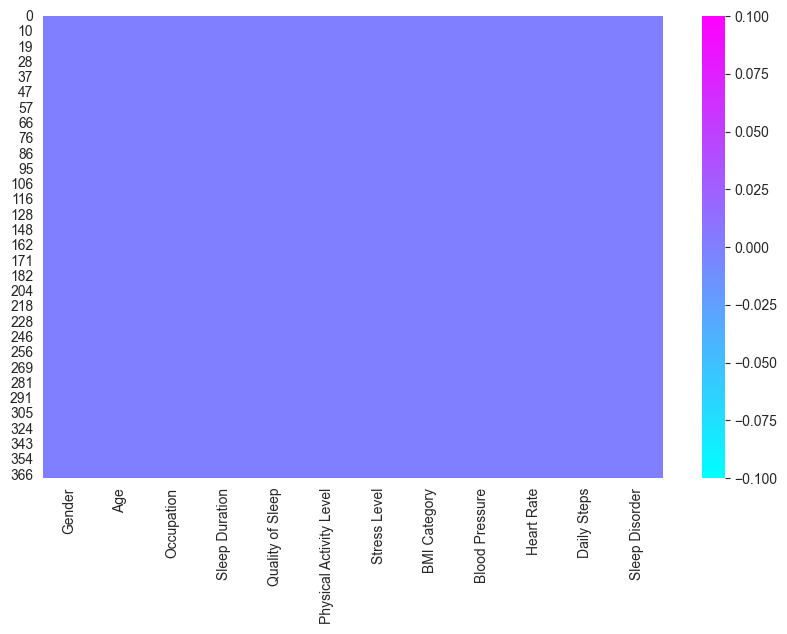

In [47]:
plt.figure(figsize=(10,6))
heatmaps = sns.heatmap(df.isna(), cmap='cool')
plt.show()

In [50]:
df_copy2 = df.copy()
nom_fichier = 'Sleep_health_and_lifestyle.xlsx'

df_copy2.to_excel(nom_fichier, index=False)